In [1]:
import os
import folderstats
import matplotlib.pyplot as plt
import squarify
import numpy as np
import datetime

folder = '/home/arnold/raindrop-detection-cnn/VOOR/'
filepaths = [os.path.join(folder, f) for f in os.listdir(folder)]

#print(os.stat(folder))

df = folderstats.folderstats(folder, ignore_hidden=True)
df.head()
#only look at folders
df_folder = df[df['folder']]
df_folder[['name', 'num_files']]


,name,num_files
162,rain,162.0
520,overcast,357.0
767,clear,246.0
920,few,152.0
1091,scattered,170.0
1182,night,90.0
1355,snow,172.0
1356,,1349.0


In [2]:
#find folders
#df[df['folder']]

#drop broken rows
df_folder = df_folder.drop(index=1356, axis=0)
# df_folder.head()

In [3]:
cloud_num = df_folder[['name', 'num_files']]
cloud_num = cloud_num.set_index('name')
cloud_num

,num_files
name,
rain,162.0
overcast,357.0
clear,246.0
few,152.0
scattered,170.0
night,90.0
snow,172.0


In [4]:
# date_time_str = '20151207T125501'
# date_time_obj = datetime.datetime.strptime(date_time_str, '%Y%m%dT%H%M%S')

# print('Date:', date_time_obj.date())
# print('Time:', date_time_obj.time())
# print('Date-time:', date_time_obj)

#drop all folders
df.drop(df.loc[df['folder']==True].index, inplace=True)
df.head()
# df[df['folder']]

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid
0,3,/home/arnold/raindrop-detection-cnn/VOOR/rain/...,20170426T153026_VOOR,jpg,78365,2020-10-05 17:33:33,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0
1,4,/home/arnold/raindrop-detection-cnn/VOOR/rain/...,20170624T120030_VOOR,jpg,85686,2020-10-05 17:32:38,2020-10-02 00:25:18,2020-10-02 00:25:18,False,NaN,1,2,0
2,5,/home/arnold/raindrop-detection-cnn/VOOR/rain/...,20170426T154527_VOOR,jpg,66160,2020-10-05 17:33:28,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0
3,6,/home/arnold/raindrop-detection-cnn/VOOR/rain/...,20190505T192530_VOOR,jpg,36187,2020-10-05 17:32:40,2020-10-01 17:18:55,2020-10-01 17:18:55,False,NaN,1,2,0
4,7,/home/arnold/raindrop-detection-cnn/VOOR/rain/...,20170426T122526_VOOR,jpg,54948,2020-10-05 17:32:38,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0


In [5]:
#get cloud type and make a new column for it
# cloud_type = df["path"].str.split("raindrop-detection-cnn/", n=1, expand = True)
# cloud_type.head()
#not working ffor some reason
# for i in range(0, len(df)): 
#     df.iloc[i].path = df.iloc[i].path[17:-1] 

# df['path'] = df['path'].str.slice(17, -1)     
# df.head()
cloud_type = df['path'].str.slice(41, -4)  
df['path'] = cloud_type
# new data frame with split value columns to seperate time from name
new_split = df["path"].str.split("/", n = 1, expand = True) 
df['cloud'] = new_split[0]
df.head()

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,cloud
0,3,rain/20170426T153026_VOOR,20170426T153026_VOOR,jpg,78365,2020-10-05 17:33:33,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain
1,4,rain/20170624T120030_VOOR,20170624T120030_VOOR,jpg,85686,2020-10-05 17:32:38,2020-10-02 00:25:18,2020-10-02 00:25:18,False,NaN,1,2,0,rain
2,5,rain/20170426T154527_VOOR,20170426T154527_VOOR,jpg,66160,2020-10-05 17:33:28,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain
3,6,rain/20190505T192530_VOOR,20190505T192530_VOOR,jpg,36187,2020-10-05 17:32:40,2020-10-01 17:18:55,2020-10-01 17:18:55,False,NaN,1,2,0,rain
4,7,rain/20170426T122526_VOOR,20170426T122526_VOOR,jpg,54948,2020-10-05 17:32:38,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain


In [6]:
# new data frame with split value columns to seperate time from name
new_split = df["path"].str.split("/", n = 1, expand = True) 
df['cloud'] = new_split[0]
df.head()

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,cloud
0,3,rain/20170426T153026_VOOR,20170426T153026_VOOR,jpg,78365,2020-10-05 17:33:33,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain
1,4,rain/20170624T120030_VOOR,20170624T120030_VOOR,jpg,85686,2020-10-05 17:32:38,2020-10-02 00:25:18,2020-10-02 00:25:18,False,NaN,1,2,0,rain
2,5,rain/20170426T154527_VOOR,20170426T154527_VOOR,jpg,66160,2020-10-05 17:33:28,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain
3,6,rain/20190505T192530_VOOR,20190505T192530_VOOR,jpg,36187,2020-10-05 17:32:40,2020-10-01 17:18:55,2020-10-01 17:18:55,False,NaN,1,2,0,rain
4,7,rain/20170426T122526_VOOR,20170426T122526_VOOR,jpg,54948,2020-10-05 17:32:38,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain


In [7]:
# dropping null value columns to avoid errors 
# data.dropna(inplace = True) 
  
# new data frame with split value columns to seperate time from name
new = df["name"].str.split("_", n = 1, expand = True) 
# print(new)
# making separate date column from new data frame and merge into orignal df
df["date"]= new[0] 
  
# making separate name column from new data frame and merge into orignal df
df["site_name"]= new[1] 
  
# Dropping old Name columns 
df.drop(columns =["name"], inplace = True) 
  
# df display 
df 

,id,path,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,cloud,date,site_name
0,3,rain/20170426T153026_VOOR,jpg,78365,2020-10-05 17:33:33,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain,20170426T153026,VOOR
1,4,rain/20170624T120030_VOOR,jpg,85686,2020-10-05 17:32:38,2020-10-02 00:25:18,2020-10-02 00:25:18,False,NaN,1,2,0,rain,20170624T120030,VOOR
2,5,rain/20170426T154527_VOOR,jpg,66160,2020-10-05 17:33:28,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain,20170426T154527,VOOR
3,6,rain/20190505T192530_VOOR,jpg,36187,2020-10-05 17:32:40,2020-10-01 17:18:55,2020-10-01 17:18:55,False,NaN,1,2,0,rain,20190505T192530,VOOR
4,7,rain/20170426T122526_VOOR,jpg,54948,2020-10-05 17:32:38,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain,20170426T122526,VOOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,1353,snow/20170314T120511_VOOR,jpg,57277,2020-10-09 15:08:04,2020-10-01 17:17:02,2020-10-01 17:17:02,False,NaN,1,1185,0,snow,20170314T120511,VOOR
1351,1354,snow/20180302T122528_VOOR,jpg,19375,2020-10-05 17:33:29,2020-10-01 17:17:49,2020-10-01 17:17:49,False,NaN,1,1185,0,snow,20180302T122528,VOOR
1352,1355,snow/20170314T122510_VOOR,jpg,57305,2020-10-05 17:33:33,2020-10-01 17:16:41,2020-10-01 17:16:41,False,NaN,1,1185,0,snow,20170314T122510,VOOR
1353,1356,snow/20180302T193029_VOOR,jpg,18743,2020-10-05 17:33:29,2020-10-01 17:18:10,2020-10-01 17:18:10,False,NaN,1,1185,0,snow,20180302T193029,VOOR


In [8]:
import pandas as pd

# converting the string to datetime format 
# df['Dates'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S') 
df['Dates'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S') 
df.head()

,id,path,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,cloud,date,site_name,Dates
0,3,rain/20170426T153026_VOOR,jpg,78365,2020-10-05 17:33:33,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain,20170426T153026,VOOR,2017-04-26 15:30:26
1,4,rain/20170624T120030_VOOR,jpg,85686,2020-10-05 17:32:38,2020-10-02 00:25:18,2020-10-02 00:25:18,False,NaN,1,2,0,rain,20170624T120030,VOOR,2017-06-24 12:00:30
2,5,rain/20170426T154527_VOOR,jpg,66160,2020-10-05 17:33:28,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain,20170426T154527,VOOR,2017-04-26 15:45:27
3,6,rain/20190505T192530_VOOR,jpg,36187,2020-10-05 17:32:40,2020-10-01 17:18:55,2020-10-01 17:18:55,False,NaN,1,2,0,rain,20190505T192530,VOOR,2019-05-05 19:25:30
4,7,rain/20170426T122526_VOOR,jpg,54948,2020-10-05 17:32:38,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain,20170426T122526,VOOR,2017-04-26 12:25:26


In [9]:
#create a new column with year of date field
df['year'] = pd.DatetimeIndex(df['date']).year
#create a new column with month of date field
df['month'] = pd.DatetimeIndex(df['date']).month
#since we have datetime obj, can extract the day/month/year using the to_period function
#where 'D', 'M', 'Y' are inputs
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df.head()

,id,path,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,cloud,date,site_name,Dates,year,month,month_year
0,3,rain/20170426T153026_VOOR,jpg,78365,2020-10-05 17:33:33,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain,20170426T153026,VOOR,2017-04-26 15:30:26,2017,4,2017-04
1,4,rain/20170624T120030_VOOR,jpg,85686,2020-10-05 17:32:38,2020-10-02 00:25:18,2020-10-02 00:25:18,False,NaN,1,2,0,rain,20170624T120030,VOOR,2017-06-24 12:00:30,2017,6,2017-06
2,5,rain/20170426T154527_VOOR,jpg,66160,2020-10-05 17:33:28,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain,20170426T154527,VOOR,2017-04-26 15:45:27,2017,4,2017-04
3,6,rain/20190505T192530_VOOR,jpg,36187,2020-10-05 17:32:40,2020-10-01 17:18:55,2020-10-01 17:18:55,False,NaN,1,2,0,rain,20190505T192530,VOOR,2019-05-05 19:25:30,2019,5,2019-05
4,7,rain/20170426T122526_VOOR,jpg,54948,2020-10-05 17:32:38,2020-10-01 23:01:33,2020-10-01 23:01:33,False,NaN,1,2,0,rain,20170426T122526,VOOR,2017-04-26 12:25:26,2017,4,2017-04


In [10]:
#drop cols that are not needed
# Dropping old Name columns 
df.drop(columns =["id", "extension", "atime", "mtime", "ctime", "folder", "depth", "parent", "uid"], inplace = True) 
df.head()

,path,size,num_files,cloud,date,site_name,Dates,year,month,month_year
0,rain/20170426T153026_VOOR,78365,NaN,rain,20170426T153026,VOOR,2017-04-26 15:30:26,2017,4,2017-04
1,rain/20170624T120030_VOOR,85686,NaN,rain,20170624T120030,VOOR,2017-06-24 12:00:30,2017,6,2017-06
2,rain/20170426T154527_VOOR,66160,NaN,rain,20170426T154527,VOOR,2017-04-26 15:45:27,2017,4,2017-04
3,rain/20190505T192530_VOOR,36187,NaN,rain,20190505T192530,VOOR,2019-05-05 19:25:30,2019,5,2019-05
4,rain/20170426T122526_VOOR,54948,NaN,rain,20170426T122526,VOOR,2017-04-26 12:25:26,2017,4,2017-04


In [11]:
#make month_year the index
df = df.set_index('month_year')
df.head()


,path,size,num_files,cloud,date,site_name,Dates,year,month
month_year,,,,,,,,,
2017-04,rain/20170426T153026_VOOR,78365,NaN,rain,20170426T153026,VOOR,2017-04-26 15:30:26,2017,4
2017-06,rain/20170624T120030_VOOR,85686,NaN,rain,20170624T120030,VOOR,2017-06-24 12:00:30,2017,6
2017-04,rain/20170426T154527_VOOR,66160,NaN,rain,20170426T154527,VOOR,2017-04-26 15:45:27,2017,4
2019-05,rain/20190505T192530_VOOR,36187,NaN,rain,20190505T192530,VOOR,2019-05-05 19:25:30,2019,5
2017-04,rain/20170426T122526_VOOR,54948,NaN,rain,20170426T122526,VOOR,2017-04-26 12:25:26,2017,4


In [12]:
cloud_num.loc['rain']

num_files    162.0
Name: rain, dtype: float64

In [13]:
#add num files from cloud_num into df
#works for single condition
# df['num_files'] = np.where(df['cloud']== 'rain', cloud_num.loc['rain'], False)
df['num_files'] = np.where(df['cloud']== 'rain', cloud_num.loc['rain'], 
                           np.where(df['cloud']== 'overcast', cloud_num.loc['overcast'], 
                                    np.where(df['cloud']== 'clear', cloud_num.loc['clear'], 
                                             np.where(df['cloud']== 'few', cloud_num.loc['few'], 
                                                      np.where(df['cloud']== 'scattered', cloud_num.loc['scattered'], 
                                                               np.where(df['cloud']== 'night', cloud_num.loc['night'], 
                                                                        np.where(df['cloud']== 'snow', cloud_num.loc['snow'], False)))))))

In [14]:
df

,path,size,num_files,cloud,date,site_name,Dates,year,month
month_year,,,,,,,,,
2017-04,rain/20170426T153026_VOOR,78365,162.0,rain,20170426T153026,VOOR,2017-04-26 15:30:26,2017,4
2017-06,rain/20170624T120030_VOOR,85686,162.0,rain,20170624T120030,VOOR,2017-06-24 12:00:30,2017,6
2017-04,rain/20170426T154527_VOOR,66160,162.0,rain,20170426T154527,VOOR,2017-04-26 15:45:27,2017,4
2019-05,rain/20190505T192530_VOOR,36187,162.0,rain,20190505T192530,VOOR,2019-05-05 19:25:30,2019,5
2017-04,rain/20170426T122526_VOOR,54948,162.0,rain,20170426T122526,VOOR,2017-04-26 12:25:26,2017,4
...,...,...,...,...,...,...,...,...,...
2017-03,snow/20170314T120511_VOOR,57277,172.0,snow,20170314T120511,VOOR,2017-03-14 12:05:11,2017,3
2018-03,snow/20180302T122528_VOOR,19375,172.0,snow,20180302T122528,VOOR,2018-03-02 12:25:28,2018,3
2017-03,snow/20170314T122510_VOOR,57305,172.0,snow,20170314T122510,VOOR,2017-03-14 12:25:10,2017,3


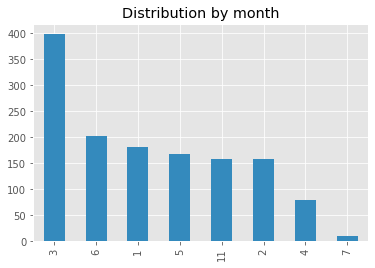

In [15]:
#show distribution by month
with plt.style.context('ggplot'):
    df['month'].value_counts().plot(
        kind='bar', color='C1', title='Distribution by month');

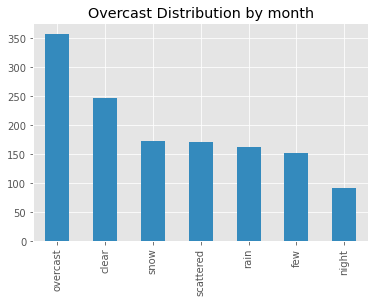

In [16]:
#show distribution by month
with plt.style.context('ggplot'):
    df['cloud'].value_counts().plot(
        kind='bar', color='C1', title='Overcast Distribution by month');

<AxesSubplot:xlabel='month_year'>

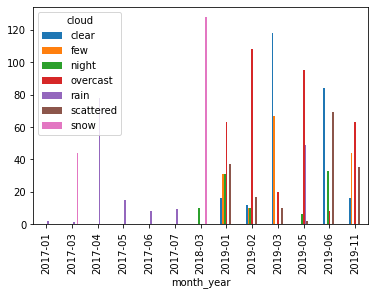

In [25]:
#plotting and saving the plots
df.groupby(['month_year','cloud']).count()['num_files'].unstack().plot( kind='bar', )

# the plot gets saved to 'output.png'
# plt.savefig('output.png')

<AxesSubplot:xlabel='month'>

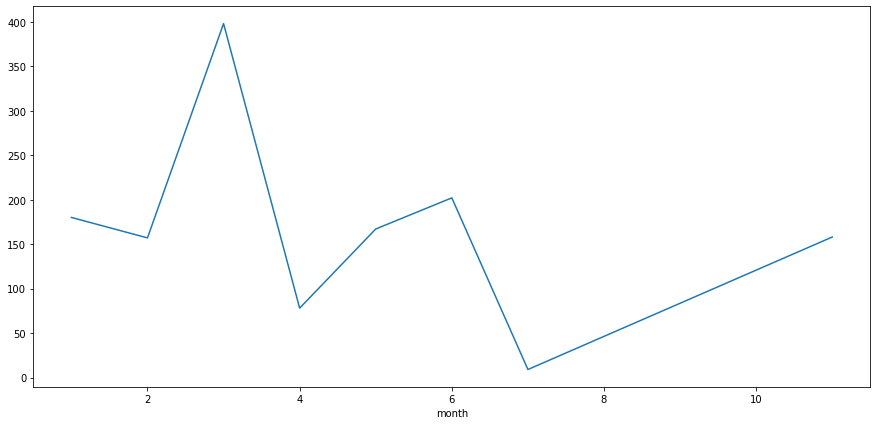

In [17]:
# df[["year", "month", "cloud", "site_name"]].plot(x="year", kind="bar")
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['month']).count()['cloud'].plot(ax=ax)

<AxesSubplot:xlabel='month'>

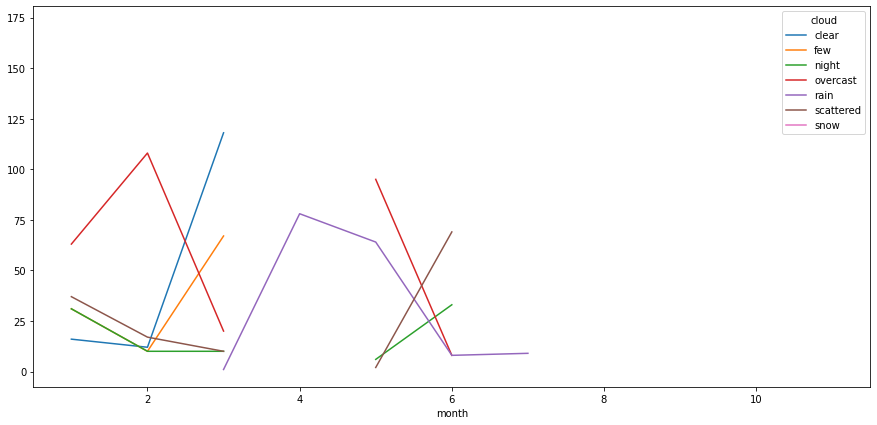

In [21]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['month','cloud']).count()['num_files'].unstack().plot(ax=ax)

In [ ]:
df_folder.plot(x='name', y='num_files', kind='bar') 


In [ ]:
#show distribution by file size
with plt.style.context('ggplot'):
    # Group by extension and sum all sizes for each extension 
#     extension_sizes = df.groupby('month')['cloud'].sum()
    extension_sizes = df.groupby('cloud')['month'].sum()
    # Sort elements by size
    extension_sizes = extension_sizes.sort_values(ascending=False)
    
    extension_sizes.plot(
        kind='bar', color='C1', title='Overcast Distribution by month');

In [ ]:
#Tree map

# Group by extension and sum all sizes for each extension
extension_sizes = df.groupby('cloud')['month'].sum()
# Sort elements by size
extension_sizes = extension_sizes.sort_values(ascending=False)

squarify.plot(sizes=extension_sizes.values, label=extension_sizes.index.values)
plt.title('Overcast Treemap by month')
plt.axis('off');

In [ ]:
with plt.style.context('ggplot'):
    # Filter the data set to only folders
    df_folders = df[df['folder']]
    # Set the name to be the index (so we can use it as a label later)
    df_folders.set_index('name', inplace=True)
    # Sort the folders by size
    df_folders = df_folders.sort_values(by='num_files', ascending=False)
    
    # Show the size of the largest 50 folders as a bar plot
    df_sizes['num_files'][:50].plot(kind='bar', color='C0', title='Category # files');

In [ ]:
with plt.style.context('ggplot'):
    y, bins = np.histogram(df['size'], bins=10000)
    plt.loglog(bins[:-1], y, '.');
    plt.ylabel('Size')
    plt.xlabel('Rank')


In [ ]:
import networkx as nx

# Sort the index
df_sorted = df.sort_values(by='id')

G = nx.Graph()
for i, row in df_sorted.iterrows():
    if row.parent:
        G.add_edge(row.id, row.parent)
    
# Print some additional information
#nodes (files and folders)
print(nx.info(G))

In [ ]:
from networkx.drawing.nx_pydot import graphviz_layout

pos_dot = graphviz_layout(G, prog='dot')

fig = plt.figure(figsize=(16, 8))
nodes = nx.draw_networkx_nodes(G, pos_dot, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_dot, edge_color='C0', width=0.5)
plt.axis('off');

In [ ]:
pos_twopi = graphviz_layout(G, prog='twopi', root=1)

fig = plt.figure(figsize=(14, 14))
nodes = nx.draw_networkx_nodes(G, pos_twopi, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_twopi, edge_color='C0', width=0.5)
plt.axis('off')
plt.axis('equal');